In [1]:
import numpy as np
import math
from scipy.linalg import solve
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 中心差分法

### 1 参数定义

In [2]:
N = 129    # N等分，要在ppt中的N+1
h = 1/(N-1)    #步长,这里再-1
eps = 10**(-2)

### 2 中心差分系数矩阵生成

In [3]:
A = np.identity(N)

left = -(2*eps+h)/(2*h**2)
mid = 2*eps/h**2
right = -(2*eps-h)/(2*h**2)

for i in range(1,N-1):
    A[i][i-1] = left
    A[i][i] = mid
    A[i][i+1] = right

### 3 右端项矩阵生成

In [4]:
f = np.zeros(N).reshape(N,1)
f[1:N-1] = 1

### 4 求解线性代数方程组

In [5]:
U = np.zeros(N).reshape(N,1)
U = solve(A,f)

### 5 比较精确解与数值解

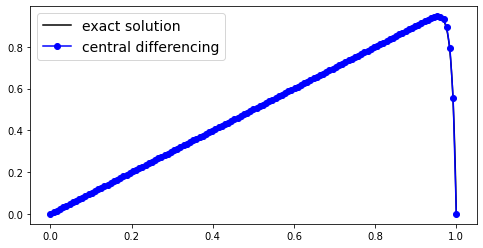

In [17]:
exact_solution = np.zeros(N).reshape(N,1)
exact_x = np.linspace(0,1,num=1000)
exact_solution = exact_x - (np.exp(-(1-exact_x)/eps)-np.exp(-1/eps))/(1-np.exp(-1/eps))
X = np.linspace(0, 1, num=N).reshape(N,1)

plt.figure(figsize=(8,4))
plt.plot(exact_x, exact_solution, label='exact solution', color='k')
plt.plot(X, U, marker='o', label='central differencing', color='b')
plt.legend(loc='upper left', fontsize=14)

plt.savefig('2.png',dpi=300, bbox_inches='tight')
plt.show()

# 迎风格式

### 1 参数定义

In [7]:
#N = 16    # N等分
#h = 1/N    #步长
#eps = 10**(-2)

### 2 迎风格式系数矩阵生成

In [8]:
A = np.identity(N)

left = -eps/h**2-1/h
mid = 2*eps/h**2+1/h
right = -eps/h**2

for i in range(1,N-1):
    A[i][i-1] = left
    A[i][i] = mid
    A[i][i+1] = right

### 3 右端项矩阵生成

In [9]:
f = np.zeros(N).reshape(N,1)
f[1:N-1] = 1

### 4 求解线性代数方程组

In [10]:
U_upwind = np.zeros(N).reshape(N,1)
U_upwind = solve(A,f)

### 5 比较精确解与数值解

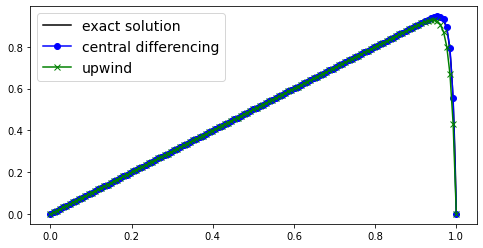

In [11]:
plt.figure(figsize=(8,4))
plt.plot(exact_x, exact_solution, label='exact solution', color='k')
plt.plot(X, U, marker='o', label='central differencing', color='b')
plt.plot(X, U_upwind, marker='x', label='upwind', color='g')
plt.legend(loc='upper left', fontsize=14)

plt.savefig('2.png',dpi=300, bbox_inches='tight')
plt.show()

# Il’in-Allen-Southwell 格式

### 1 参数定义

In [12]:
#N = 16    # N等分
#h = 1/N    #步长
#eps = 10**(-2)

### 2 Il’in-Allen-Southwell Difference 格式系数矩阵生成

In [13]:
A = np.identity(N)

p = (h)/(eps)
left = -(math.exp(p))/(h*(math.exp(p)-1))
mid = (math.exp(p)+1)/(h*(math.exp(p)-1))
right = -(1)/(h*(math.exp(p)-1))

for i in range(1,N-1):
    A[i][i-1] = left
    A[i][i] = mid
    A[i][i+1] = right

### 3 右端项矩阵生成

In [14]:
f = np.zeros(N).reshape(N,1)
f[1:N-1] = 1

### 4 求解线性代数方程组

In [15]:
U_allen = np.zeros(N).reshape(N,1)
U_allen = solve(A,f)

### 5 比较精确解与数值解

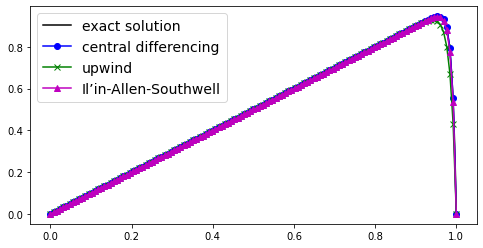

In [18]:
plt.figure(figsize=(8,4))
plt.plot(exact_x, exact_solution, label='exact solution', color='k')
plt.plot(X, U, marker='o', label='central differencing', color='b')
plt.plot(X, U_upwind, marker='x', label='upwind', color='g')
plt.plot(X, U_allen, marker='^', label='Il’in-Allen-Southwell', color='m')

plt.legend(loc='upper left', fontsize=14)

plt.savefig('2.png',dpi=300, bbox_inches='tight')
plt.show()